In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns


/Users/pokutnik/anaconda3/envs/ekans/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [58]:
%matplotlib inline

In [25]:
url = 'https://www.cryptocompare.com/api/forum/get/posts/?tId=1182&tPosts=200'
next_url_f = 'https://www.cryptocompare.com/api/forum/get/posts/?lId={}&tId=1182&tPosts=20'
resp = requests.get(url)
r = resp.json()
pages = []

In [26]:
while r['MoreAvailable']:
        pages.extend(r['PostArray'])
        last_id = r['PostArray'][-1]['Id']
        print last_id
        resp = requests.get(next_url_f.format(last_id))
        r = resp.json()
        

61203
60509
59757
59009
58364
57063
56196
55054
54464
53813
53232
52227
51357
50332
49227
48279
47702
47385
47108
46774
46260
45816
45609
45047
44011
42989
41859
40636
39857
39012
38150
37771
37286
36943
36437
35914
34762
34327
33647
32829
31708
31132
30667
30348
30077
29609
29025
28835
28478
27932
27030
26356
25968
25785
25565
25392
25282
25117
24917
24720
24509
24337
24053
23898
23647
23139
22760
22584
22521
22380
22207
22090
21872
21711
21446
21243
21069
20977
20639
20547
20416
20324
20178
20049
19752
19510
19318
19151
19036
18883
18787
18715
18641
18566
18431
18355
18214
18081
17986
17910
17700
17434
17038
16770
16583
16462
16168
15768
15462
14792
14133
13797
13498
13250
12784
12172
11972
11722
11528
11311
11152
10851
10157
9887
9753
9392
8859
8155
7236
6248
5120
4170
3921
3728
3637
3482
3391
2149


In [41]:
len(pages)

2940

In [45]:
ccompare = pd.io.json.json_normalize(pages)
ts = map(lambda x: int(x['Timestamp']), pages)
ccompare['Timestamp'] = pd.to_datetime(pd.Series(ts), unit='ms')

In [52]:
ccompare.sample(1).to_dict()

{'Actions.Agree.Involved': {2331: False},
 'Actions.Agree.Total': {2331: 2},
 'Actions.Comment.Involved': {2331: False},
 'Actions.Comment.NextLoad': {2331: 0},
 'Actions.Comment.Total': {2331: 1},
 'Actions.Disagree.Involved': {2331: False},
 'Actions.Disagree.Total': {2331: 0},
 'Actions.Report.Involved': {2331: False},
 'Actions.Report.Total': {2331: 0},
 u'Body': {2331: u'Butcoin seems to be stabilising now...'},
 'Cryptopian.Avatar': {2331: u'https://images.cryptocompare.com/1483/0f88a84e-d9e1-4834-a0eb-6cf4db4c36a6.png'},
 'Cryptopian.Id': {2331: 1483},
 'Cryptopian.Name': {2331: u'CryptoBond'},
 u'Edited': {2331: False},
 u'Id': {2331: 15920},
 u'Notification': {2331: False},
 u'Sticky': {2331: False},
 u'ThreadId': {2331: 1182},
 u'Timestamp': {2331: Timestamp('2016-10-24 19:48:18.063000')}}

In [54]:
ccompare.to_csv('posts_ccompare_raw.csv', encoding='utf-8')

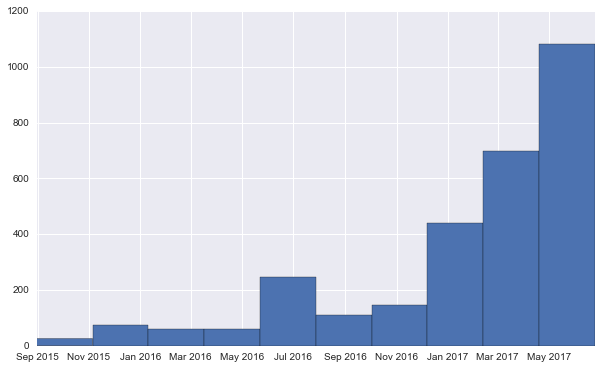

In [60]:
ccompare.Timestamp.hist(figsize=(10, 6))

In [61]:
ccompare.sample(10)

,Actions.Agree.Involved,Actions.Agree.Total,Actions.Comment.Involved,Actions.Comment.NextLoad,Actions.Comment.Total,Actions.Disagree.Involved,Actions.Disagree.Total,Actions.Report.Involved,Actions.Report.Total,Body,Cryptopian.Avatar,Cryptopian.Id,Cryptopian.Name,Edited,Id,Notification,Sticky,ThreadId,Timestamp
1239,False,1,False,0,3,False,0,False,0,Well what do you guys think it can&#39;t be ki...,https://images.cryptocompare.com/14101/6c4adee...,14101,jsngpaw,False,25968,False,False,1182,2017-03-28 12:42:59.387
2689,False,6,False,0,3,False,0,False,0,To the moon?,https://images.cryptocompare.com/3831/295b2e24...,3831,ZeroCool86,False,9555,False,False,1182,2016-06-03 21:11:25.847
843,False,1,False,0,0,False,0,False,0,I saw a post on Zero Hedge about trading volum...,https://images.cryptocompare.com/72605/657e581...,72605,bryant.nielson,False,37182,False,False,1182,2017-05-11 17:07:22.593
472,False,0,False,0,0,False,0,False,0,I do not know how to use it. Is someone who wa...,https://images.cryptocompare.com/106614/78b077...,106614,miftari.zenel97,False,49881,False,False,1182,2017-05-31 15:49:16.720
941,False,0,False,0,0,False,0,False,0,Which trading systems work in digital cryptocu...,https://images.cryptocompare.com/68087/ac0a215...,68087,alinemayogk71,False,34242,False,False,1182,2017-05-05 09:09:15.453
2395,False,0,False,0,1,False,0,False,0,http://www.thebtcgenerator.com/,https://images.cryptocompare.com/26234/6ee7b72...,26234,marvelcool.cool,True,14234,False,False,1182,2016-08-30 21:39:30.170
1005,False,3,False,0,0,False,1,False,0,"I will sleep now at $1,333.00. See you tomorro...",https://images.cryptocompare.com/13951/efc896b...,13951,jehzlau,False,31539,False,False,1182,2017-04-27 15:37:40.047
1202,False,2,False,2,8,False,0,False,0,Is anyone else having a even more fucked up de...,https://images.cryptocompare.com/14101/6c4adee...,14101,jsngpaw,False,26988,False,False,1182,2017-04-01 21:16:07.823
2741,False,1,False,0,0,False,0,False,0,OBITS BUYBACK in MAY with 2.368.054 BTS = 24 B...,https://images.cryptocompare.com/18314/6407192...,18314,ccedk.projects,False,8098,False,False,1182,2016-05-03 14:01:05.873
745,False,2,False,1,7,False,0,False,0,"I love bitcoin until today ,,,Iam waiting for ...",https://images.cryptocompare.com/46359/6e87a0b...,46359,thenewkid72,False,40396,False,False,1182,2017-05-18 08:54:13.553
